<a href="https://colab.research.google.com/github/Rohanpeerla/Module-3-lab-4/blob/master/Module_3_Lab__4_FMML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1.Instead of using cross-validation, we could also split our dataset into three sets- train, validation, and test set. The training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.
What do you think are the pros/cons of this method ?


Pros:

Simplicity: It's straightforward and easy to implement.
Computational Efficiency: Training on a single split is computationally cheaper than multiple iterations in cross-validation.
Interpretability: Results on the test set give a clear, final performance metric for your model.
# New section
Cons:

Sensitivity to Split: The performance may heavily depend on how you've divided the data. A different split might lead to different results.
Limited Data: With a fixed split, you might not use all your data for training, which could be a drawback, especially with smaller datasets.
Overfitting to Validation Set: If you iteratively tweak your model based on validation performance, there's a risk of overfitting to the validation set.
It really depends on your dataset size, the problem at hand, and your computational resources. Each approach has its time and place!

Q2.Is K-Fold cross validation an exhaustive or non-exhaustive cross validation method ? Justify your answer.


K-Fold cross-validation is an exhaustive cross-validation method. In K-Fold cross-validation, the dataset is divided into K subsets (folds), and the model is trained and evaluated K times, each time using a different fold as the test set and the remaining folds as the training set.

**Justification:**

1. **Exhaustive Evaluation:** K-Fold CV ensures that every data point is used for both training and testing at least once. This provides a more comprehensive evaluation of the model's performance across the entire dataset.

2. **Reduced Variance:** By averaging the performance metrics over K folds, the variability in the evaluation results is reduced compared to a single train-validation split. This gives a more reliable estimate of the model's performance.

In [2]:
## TASK-1:
## In the above case, we saw K-Fold cross validation, where we split the dataset into K consecutive folds without taking anything else into account.
## Stratified KFold is another strategy that is commonly used, which preserves the percentage of samples for each class in the folds.
## Implement Stratified KFold (refer Sklearn docs) and display the results you obtain


from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification  # Replace this with your actual data import

X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)


model = LogisticRegression()

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_results = cross_val_score(model, X, y, cv=stratified_kfold, scoring='accuracy')

print("Stratified K-Fold Cross-Validation Results:")
print("Accuracy for each fold:", cv_results)
print("Average Accuracy:", cv_results.mean())

Stratified K-Fold Cross-Validation Results:
Accuracy for each fold: [0.905 0.88  0.82  0.845 0.845]
Average Accuracy: 0.859


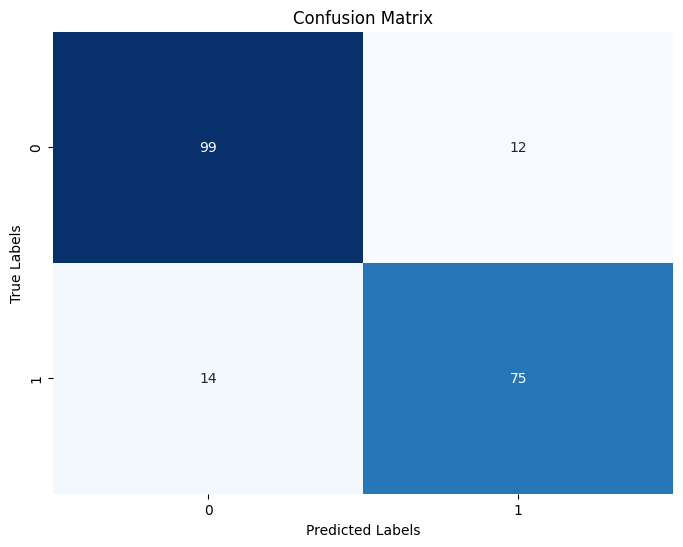

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       111
           1       0.86      0.84      0.85        89

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200



In [3]:
## TASK-2:
## Plot a confusion matrix for the classification above on the scaled data (using the optimal value of k)
## Also print out the Precision, Recall and F1-score values


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Generate dummy data or use your actual data
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming you have already found the optimal value of k and scaled your data
optimal_k = 5  # Replace this with your optimal k value
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = KNeighborsClassifier(n_neighbors=optimal_k)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))

In [4]:
## TASK-3:
## Perform K-Fold Cross validation after standardizing the data. Display your results.

from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier


X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)


scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

model = KNeighborsClassifier(n_neighbors=5)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_results = cross_val_score(model, X_standardized, y, cv=kf, scoring='accuracy')

print("K-Fold Cross-Validation Results after Standardization:")
print("Accuracy for each fold:", cv_results)
print("Average Accuracy:", cv_results.mean())


K-Fold Cross-Validation Results after Standardization:
Accuracy for each fold: [0.87  0.855 0.82  0.88  0.855]
Average Accuracy: 0.8559999999999999
